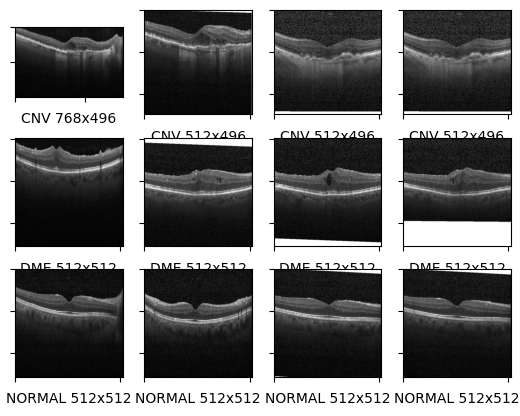

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import shutil
import tensorflow as tf

from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Conv2D, Dropout, MaxPool2D, Input, Conv2DTranspose, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
#from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.model_selection import train_test_split
import random
import h5py
from IPython.display import display
from PIL import Image as im
import datetime
import random
from tensorflow.python.keras import layers

train_path='C:/Users/AI_Server07/Desktop/distillation-/data/train'

for i, folder in enumerate(os.listdir(train_path)):
    for j, img in enumerate(os.listdir(train_path+"/"+folder)):
        filename = train_path+"/"+folder + "/" + img
        img= im.open(filename)
        ax = plt.subplot(3,4,4*i+j+1)
        ax.set_xlabel(folder+ ' '+ str(img.size[0]) +'x'+ str(img.size[1]))
        plt.imshow(img, 'gray')
        ax.set_xlabel(folder+ ' '+ str(img.size[0]) +'x'+ str(img.size[1]))
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        #plt.axis('off')
        img.close()
        if j>2:
            break

In [ ]:
def trainGenerator(batch_size, train_path):
    datagen = ImageDataGenerator(rescale=1. / 255, rotation_range=5, shear_range=0.02, zoom_range=0.1,
                                       brightness_range=[0.7,1.3],  horizontal_flip=True,
                                         vertical_flip=True, fill_mode='nearest')
    train_gen = datagen.flow_from_directory(train_path, batch_size=batch_size,target_size=(224, 224), shuffle=True, seed=1, class_mode="categorical" )
    for image, label in train_gen:
        yield (image, label)

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255, )
def validGenerator(batch_size, valid_path):
    valid_gen = datagen.flow_from_directory(valid_path, batch_size=batch_size, target_size=(224, 224),shuffle=True, seed=1 )
    for image, label in valid_gen:
        yield (image, label)

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
                   include_top = False, # Leave out the last fully connected layer
                   weights = 'imagenet')